In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
file_path= "SoilData.csv"

# Read the CSV file into a DataFrame with a different encoding
df = pd.read_csv(file_path, encoding='latin1')

# Display the DataFrame
print(df)



      ï»¿StudyID ExperimentID Author_F Author_G  YearPublication  \
0              1          1-1    Abawi     G.S.             2000   
1              1          1-1    Abawi     G.S.             2000   
2              1          1-2    Abawi     G.S.             2000   
3              1          1-1    Abawi     G.S.             2000   
4              1          1-4    Abawi     G.S.             2000   
...          ...          ...      ...      ...              ...   
5902         321        321-2    Banda    A. Z.             1994   
5903         321        321-3    Banda    A. Z.             1994   
5904         321        321-1    Banda    A. Z.             1994   
5905         321        321-2    Banda    A. Z.             1994   
5906         321        321-3    Banda    A. Z.             1994   

      SamplingYear               Journal SiteInfor Country  Latitude  ...  \
0              NaN  Applied Soil Ecology  New York     USA     40.71  ...   
1              NaN  Applied S

C:\Temp\ipykernel_4720\218545795.py:7: DtypeWarning: Columns (16,19,20,52,77,122,150,152,160,192,197,212,232,237,242,247,252,262,265,266) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin1')


In [2]:
print(df.columns)


Index(['ï»¿StudyID', 'ExperimentID', 'Author_F', 'Author_G', 'YearPublication',
       'SamplingYear', 'Journal', 'SiteInfor', 'Country', 'Latitude',
       ...
       'Microelement', 'SQI', 'ESS', 'Texture_C', 'Comments1', 'Comments2',
       'Comments3', 'Unnamed: 270', 'Unnamed: 271', 'Unnamed: 272'],
      dtype='object', length=273)


In [3]:
# Find the total number of columns
total_columns = df.shape[1]

# Print the total number of columns
print(f'Total number of columns: {total_columns}')


Total number of columns: 273


In [4]:
# Specify the names of the columns you want to keep
columns_to_keep = [
    'SoilFamily', 'CoverCrop', 'CoverCropGroup',
    'GrainCrop', 'GrainCropGroup',
    'Texture', 'SoilpH', 'SiteInfor', 'Country',
    'Latitude', 'Longitude', 'Elevation',
    'Tannual', 'MAT', 'MAP'
]

# Check if all specified columns exist in the DataFrame
missing_columns = [col for col in columns_to_keep if col not in df.columns]
if missing_columns:
    print(f"Columns not found in DataFrame: {missing_columns}")
else:
    # Filter columns by name
    df_filtered = df[columns_to_keep]

    # Display the DataFrame with filtered columns
    print(df_filtered)


     SoilFamily       CoverCrop CoverCropGroup            GrainCrop  \
0           NaN    White_clover         Legume  Bean/Beet/Corn/Bean   
1           NaN           Vetch         Legume  Bean/Beet/Corn/Bean   
2           NaN   White_mustard       Brassica  Bean/Beet/Corn/Bean   
3           NaN         Alfalfa         Legume  Bean/Beet/Corn/Bean   
4           NaN        Ryegrass            Rye  Bean/Beet/Corn/Bean   
...         ...             ...            ...                  ...   
5902  Cambisols  Hawaiian giant  BroadleafTree                Maize   
5903  Cambisols      Cunningham  BroadleafTree                Maize   
5904  Cambisols            Peru  BroadleafTree                Maize   
5905  Cambisols  Hawaiian giant  BroadleafTree                Maize   
5906  Cambisols      Cunningham  BroadleafTree                Maize   

     GrainCropGroup       Texture  SoilpH SiteInfor Country  Latitude  \
0               MTT  NotAvailable     NaN  New York     USA     40.71   
1

In [5]:
def nan_sum_per_column(df):

    """
    Calculate the sum of NaN values in each column of a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - pandas Series containing the sum of NaN values for each column
    """
    nan_sums= df.isna().sum()
    for column, nan_sum in nan_sums.items():
        print(f"Sum of NA in {column}: {nan_sum}") 


nan_sum_per_column(df_filtered)




Sum of NA in SoilFamily: 1649
Sum of NA in CoverCrop: 856
Sum of NA in CoverCropGroup: 845
Sum of NA in GrainCrop: 412
Sum of NA in GrainCropGroup: 291
Sum of NA in Texture: 981
Sum of NA in SoilpH: 3433
Sum of NA in SiteInfor: 54
Sum of NA in Country: 0
Sum of NA in Latitude: 23
Sum of NA in Longitude: 23
Sum of NA in Elevation: 410
Sum of NA in Tannual: 5374
Sum of NA in MAT: 4472
Sum of NA in MAP: 2832


Text(0.5, 1.0, 'Heatmap')

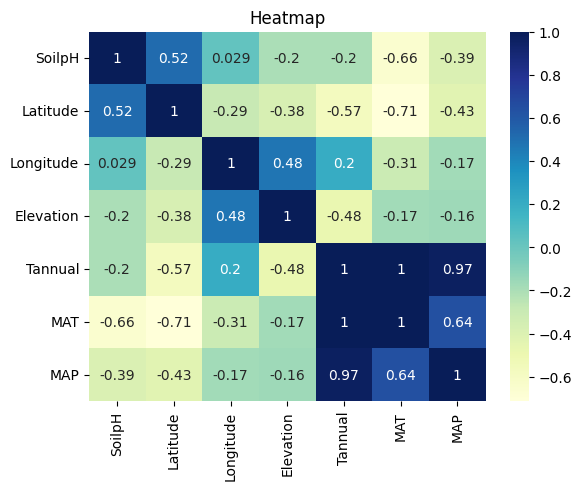

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
num_cor = df_filtered.select_dtypes(['int64','float64']).corr()
sns.heatmap(num_cor,cmap = 'YlGnBu',annot = True)
plt.title('Heatmap')

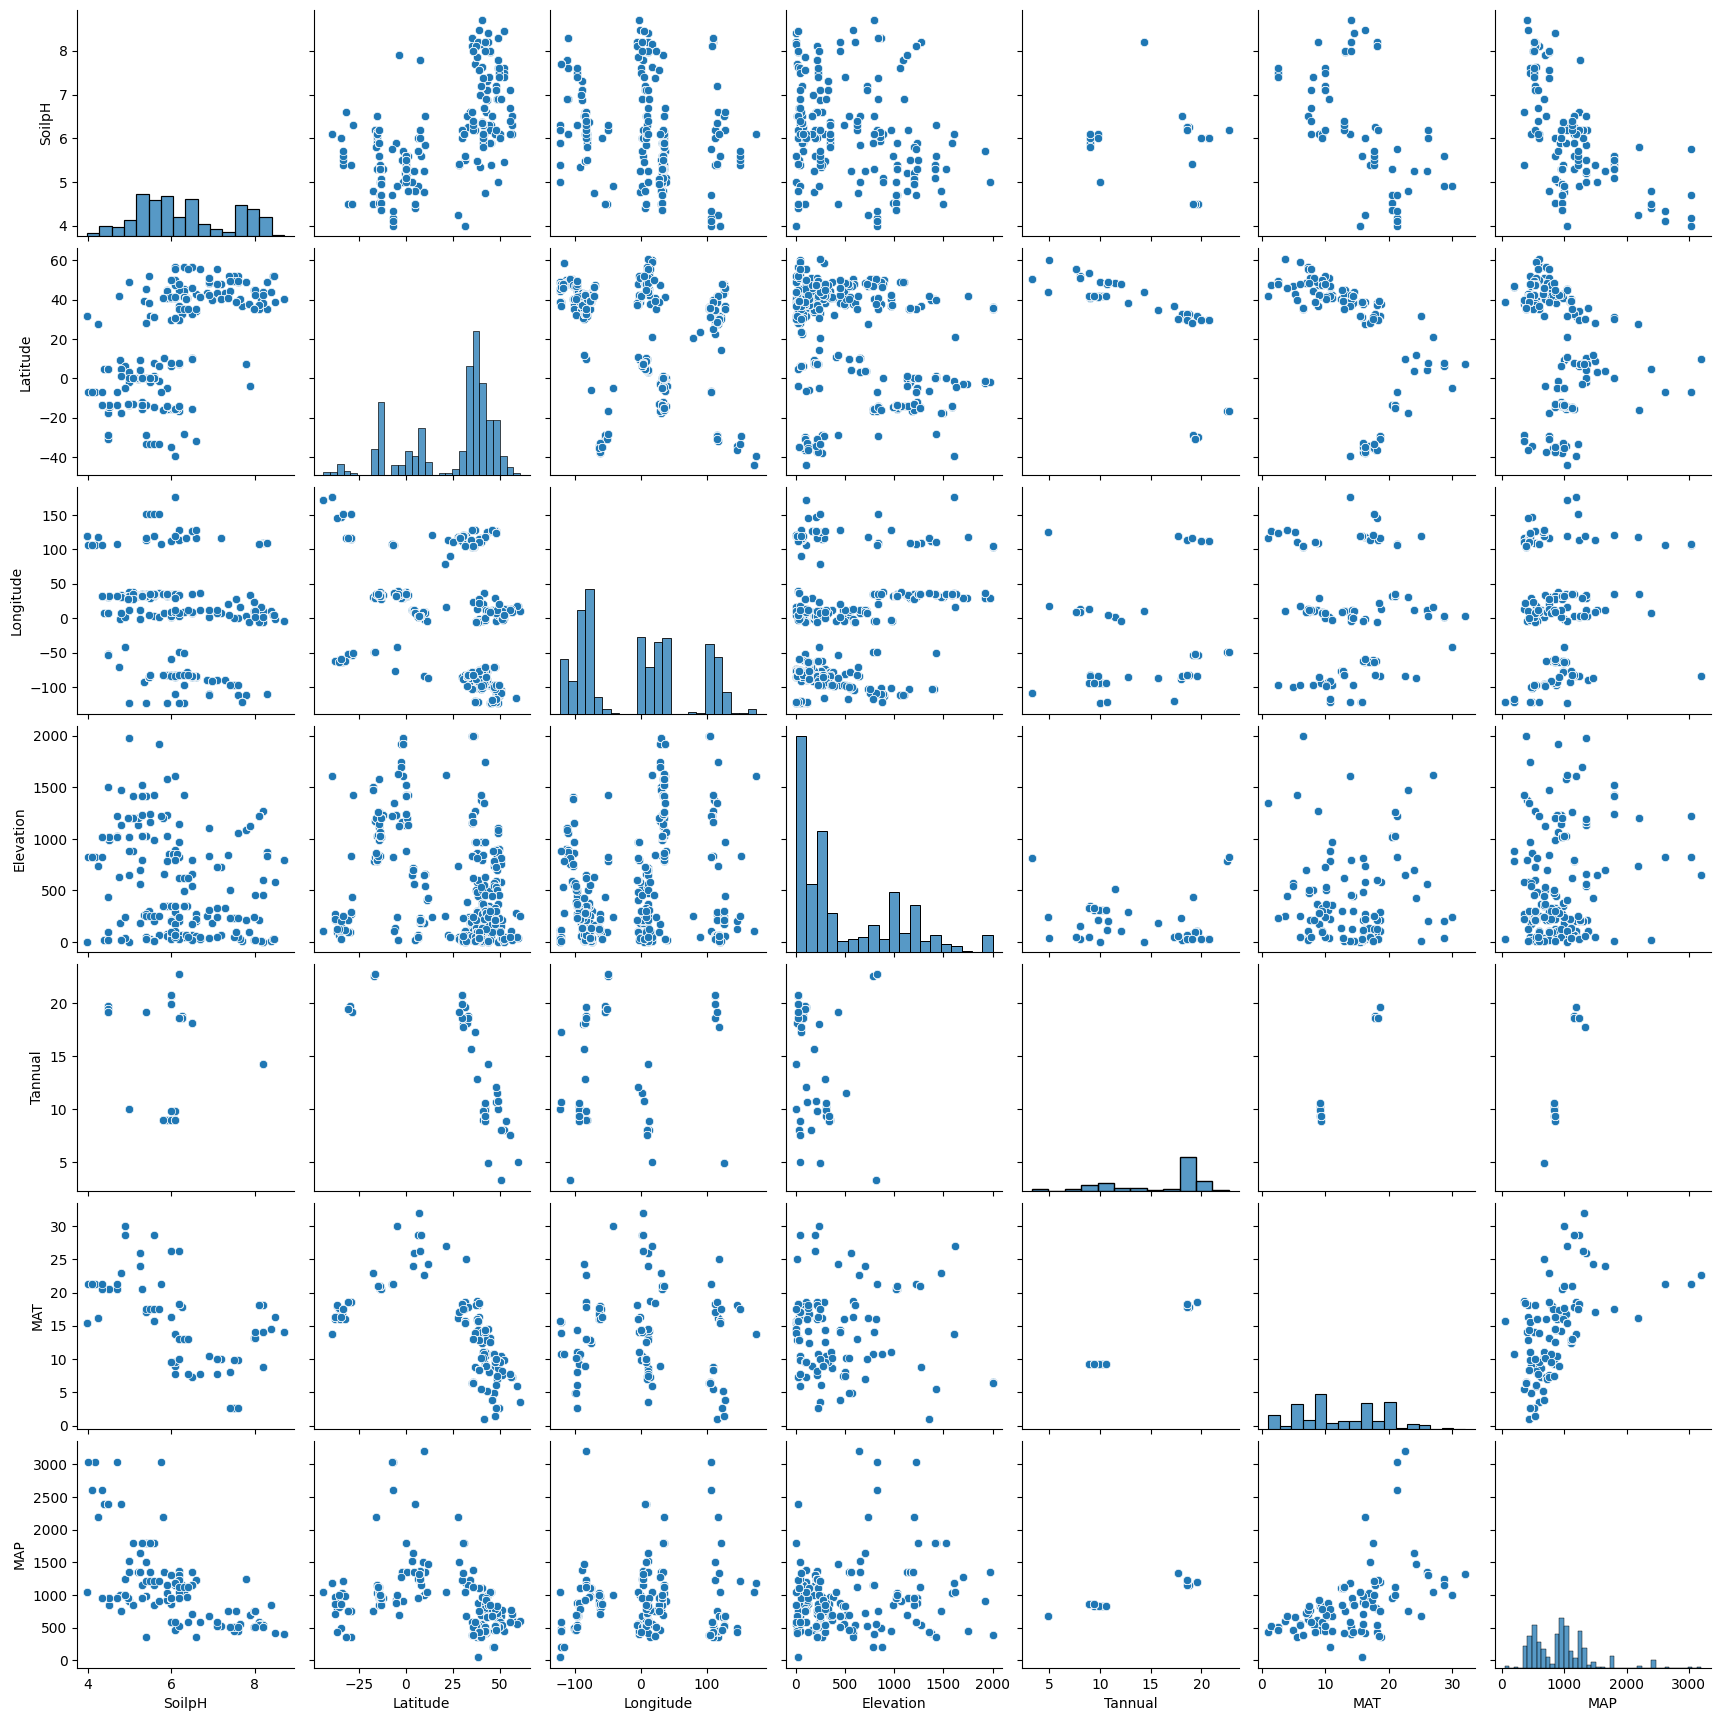

In [7]:
sns.pairplot(df_filtered)

Text(0.5, 1.0, 'MAT')

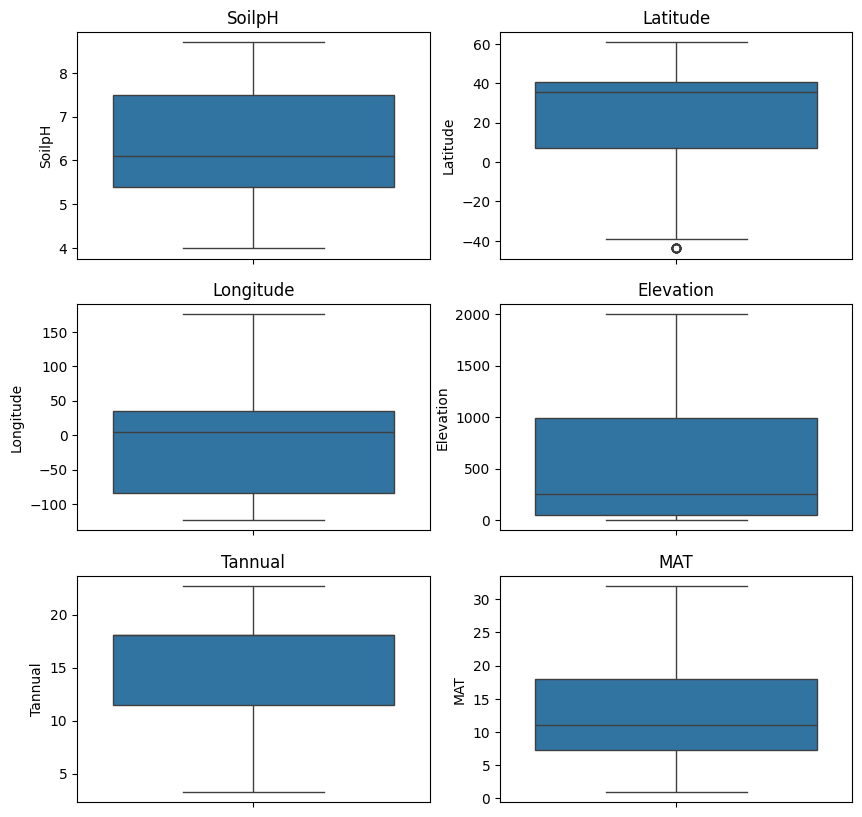

In [8]:
plt.figure(figsize = (10,10))

plt.subplot(3,2,1)
sns.boxplot(data= df_filtered['SoilpH'])
plt.title('SoilpH')


plt.subplot(3,2,2)
sns.boxplot(data= df_filtered['Latitude'])
plt.title('Latitude')

plt.subplot(3,2,3)
sns.boxplot(data= df_filtered['Longitude'])
plt.title('Longitude')

plt.subplot(3,2,4)
sns.boxplot(data= df_filtered['Elevation'])
plt.title('Elevation')

plt.subplot(3,2,5)
sns.boxplot(data= df_filtered['Tannual'])
plt.title('Tannual')


plt.subplot(3,2,6)
sns.boxplot(data= df_filtered['MAT'])
plt.title('MAT')



In [9]:
df_filtered.dropna(subset=['SiteInfor'], inplace=True)
df_filtered.dropna(subset=['SoilFamily'], inplace=True)
df_filtered.dropna(subset=['CoverCrop'], inplace=True)
df_filtered.dropna(subset=['CoverCropGroup'], inplace=True)
df_filtered.dropna(subset=['GrainCrop'], inplace=True)
df_filtered.dropna(subset=['Texture'], inplace=True)


C:\Temp\ipykernel_4720\404899709.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(subset=['SiteInfor'], inplace=True)
C:\Temp\ipykernel_4720\404899709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(subset=['SoilFamily'], inplace=True)
C:\Temp\ipykernel_4720\404899709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(subset=['CoverCrop'], inplace=True)
C:\Temp\ipykernel_

In [10]:
nan_sum_per_column(df_filtered)


Sum of NA in SoilFamily: 0
Sum of NA in CoverCrop: 0
Sum of NA in CoverCropGroup: 0
Sum of NA in GrainCrop: 0
Sum of NA in GrainCropGroup: 0
Sum of NA in Texture: 0
Sum of NA in SoilpH: 1903
Sum of NA in SiteInfor: 0
Sum of NA in Country: 0
Sum of NA in Latitude: 0
Sum of NA in Longitude: 0
Sum of NA in Elevation: 42
Sum of NA in Tannual: 3032
Sum of NA in MAT: 2880
Sum of NA in MAP: 1835


In [11]:
import pandas as pd
from sklearn.impute import KNNImputer
import numpy as np

# Assuming you have a DataFrame with missing values
# df_filtered is your DataFrame, and you want to impute missing values in columns ['MAT', 'MAP', 'Tannual', 'Elevation', 'SoilpH', 'Latitude', 'Longitude']

# Create a DataFrame with the columns you want to impute
cols_to_impute = ['MAT', 'MAP', 'Tannual', 'Elevation', 'SoilpH', 'Latitude', 'Longitude']
df_filtered_to_impute = df_filtered[cols_to_impute].copy()  # Create a copy to avoid modifying the original DataFrame

# Define the parameter grid for grid search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}  # You can extend this list based on your needs

best_score = float('inf')
best_n_neighbors = None

for n_neighbors in param_grid['n_neighbors']:
    # Initialize the KNN imputer with the current n_neighbors
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)

    # Perform imputation on the selected columns
    df_filtered_to_impute[cols_to_impute] = knn_imputer.fit_transform(df_filtered_to_impute)

    # Evaluate imputation performance using mean squared error, ignoring NaN values
    mse = np.nanmean((df_filtered[cols_to_impute].values - df_filtered_to_impute[cols_to_impute].values) ** 2)
    
    # Update best parameters if the current one is better
    if mse < best_score:
        best_score = mse
        best_n_neighbors = n_neighbors

# Print the best parameter
print("Best Number of Neighbors:", best_n_neighbors)

# Perform imputation using the best parameters on the entire DataFrame
knn_imputer = KNNImputer(n_neighbors=best_n_neighbors)
df_filtered.loc[:, cols_to_impute] = knn_imputer.fit_transform(df_filtered[cols_to_impute])


Best Number of Neighbors: 3


In [12]:
# Before imputation
print("Initial DataFrame Info:")
print(df_filtered_to_impute.info())

# After imputation
print("\nDataFrame Info After Imputation:")
print(df_filtered.info())


Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 3451 entries, 11 to 5906
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MAT        3451 non-null   float64
 1   MAP        3451 non-null   float64
 2   Tannual    3451 non-null   float64
 3   Elevation  3451 non-null   float64
 4   SoilpH     3451 non-null   float64
 5   Latitude   3451 non-null   float64
 6   Longitude  3451 non-null   float64
dtypes: float64(7)
memory usage: 215.7 KB
None

DataFrame Info After Imputation:
<class 'pandas.core.frame.DataFrame'>
Index: 3451 entries, 11 to 5906
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SoilFamily      3451 non-null   object 
 1   CoverCrop       3451 non-null   object 
 2   CoverCropGroup  3451 non-null   object 
 3   GrainCrop       3451 non-null   object 
 4   GrainCropGroup  3451 non-null   object 
 5   Texture   

In [13]:
# Before imputation
print("Unique Values Before Imputation:")
print(df_filtered_to_impute.nunique())

# After imputation
print("\nUnique Values After Imputation:")
print(df_filtered.nunique())


Unique Values Before Imputation:
MAT           44
MAP           72
Tannual       41
Elevation    172
SoilpH        65
Latitude     170
Longitude    170
dtype: int64

Unique Values After Imputation:
SoilFamily        149
CoverCrop         269
CoverCropGroup     20
GrainCrop          96
GrainCropGroup     21
Texture            17
SoilpH             65
SiteInfor         187
Country            28
Latitude          170
Longitude         170
Elevation         172
Tannual            41
MAT                44
MAP                72
dtype: int64


In [14]:
nan_sum_per_column(df_filtered)


Sum of NA in SoilFamily: 0
Sum of NA in CoverCrop: 0
Sum of NA in CoverCropGroup: 0
Sum of NA in GrainCrop: 0
Sum of NA in GrainCropGroup: 0
Sum of NA in Texture: 0
Sum of NA in SoilpH: 0
Sum of NA in SiteInfor: 0
Sum of NA in Country: 0
Sum of NA in Latitude: 0
Sum of NA in Longitude: 0
Sum of NA in Elevation: 0
Sum of NA in Tannual: 0
Sum of NA in MAT: 0
Sum of NA in MAP: 0


In [15]:
df_filtered.head()

,SoilFamily,CoverCrop,CoverCropGroup,GrainCrop,GrainCropGroup,Texture,SoilpH,SiteInfor,Country,Latitude,Longitude,Elevation,Tannual,MAT,MAP
11,Pachic Ultic Argixeroll,Rye,Rye,Corn/Wheat/Broccoli,MTT,Silt loam,6.266667,North Willamette Research and Extension Ce...,USA,45.23,-122.76,48.4,10.0,17.833333,1040.0
12,Pachic Ultic Argixeroll,Red_clover,Legume,Corn/Wheat/Broccoli,MTT,Silt loam,6.266667,North Willamette Research and Extension Ce...,USA,45.23,-122.76,48.4,10.0,17.833333,1040.0
13,Haplustoll,Rye_Fall_seeded_winter,Rye,Dry_bean,Vegetable,Loam,6.100000,"Lethbridge, AB, Canada",Canada,49.69,-112.84,901.0,3.3,14.000000,489.0
14,Haplustoll,Barley_Fall_seeded,Grass,Dry_bean,Vegetable,Loam,6.100000,"Lethbridge, AB, Canada",Canada,49.69,-112.84,901.0,3.3,14.000000,489.0
15,Haplustoll,Oat_Fall_seeded,Grass,Dry_bean,Vegetable,Loam,6.100000,"Lethbridge, AB, Canada",Canada,49.69,-112.84,901.0,3.3,14.000000,489.0


In [16]:
df_filtered.tail()

,SoilFamily,CoverCrop,CoverCropGroup,GrainCrop,GrainCropGroup,Texture,SoilpH,SiteInfor,Country,Latitude,Longitude,Elevation,Tannual,MAT,MAP
5902,Cambisols,Hawaiian giant,BroadleafTree,Maize,Corn,Sandy loam,5.2,Nkhande,Malawi,-14.78,34.6,1260.0,22.7,21.0,1125.0
5903,Cambisols,Cunningham,BroadleafTree,Maize,Corn,Sandy loam,5.2,Nkhande,Malawi,-14.78,34.6,1260.0,22.7,21.0,1125.0
5904,Cambisols,Peru,BroadleafTree,Maize,Corn,Sandy loam,5.2,Nkhande,Malawi,-14.78,34.6,1260.0,22.7,21.0,1125.0
5905,Cambisols,Hawaiian giant,BroadleafTree,Maize,Corn,Sandy loam,5.2,Nkhande,Malawi,-14.78,34.6,1260.0,22.7,21.0,1125.0
5906,Cambisols,Cunningham,BroadleafTree,Maize,Corn,Sandy loam,5.2,Nkhande,Malawi,-14.78,34.6,1260.0,22.7,21.0,1125.0


In [17]:
df_filtered.shape

(3451, 15)

In [18]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3451 entries, 11 to 5906
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SoilFamily      3451 non-null   object 
 1   CoverCrop       3451 non-null   object 
 2   CoverCropGroup  3451 non-null   object 
 3   GrainCrop       3451 non-null   object 
 4   GrainCropGroup  3451 non-null   object 
 5   Texture         3451 non-null   object 
 6   SoilpH          3451 non-null   float64
 7   SiteInfor       3451 non-null   object 
 8   Country         3451 non-null   object 
 9   Latitude        3451 non-null   float64
 10  Longitude       3451 non-null   float64
 11  Elevation       3451 non-null   float64
 12  Tannual         3451 non-null   float64
 13  MAT             3451 non-null   float64
 14  MAP             3451 non-null   float64
dtypes: float64(7), object(8)
memory usage: 431.4+ KB


In [19]:
df_filtered.describe()

,SoilpH,Latitude,Longitude,Elevation,Tannual,MAT,MAP
count,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000
mean,6.372805,23.149000,-40.475995,444.967169,15.320558,15.261447,909.683435
std,0.994150,24.079934,65.720973,498.752056,5.790875,4.963949,406.239900
min,4.350000,-43.760000,-123.260000,1.700000,3.300000,4.900000,42.100000
25%,5.600000,4.850000,-88.250000,55.300000,10.050000,9.300000,489.000000
50%,6.500000,35.000000,-77.650000,223.000000,15.700000,15.600000,920.000000
75%,6.980000,40.100000,17.120000,853.000000,19.700000,18.600000,1150.000000
max,8.700000,59.810000,172.020000,2000.000000,22.700000,27.000000,2400.000000


In [20]:
df_filtered.groupby('GrainCropGroup').count()

,SoilFamily,CoverCrop,CoverCropGroup,GrainCrop,Texture,SoilpH,SiteInfor,Country,Latitude,Longitude,Elevation,Tannual,MAT,MAP
GrainCropGroup,,,,,,,,,,,,,,
AVG,100,100,100,100,100,100,100,100,100,100,100,100,100,100
Arable,457,457,457,457,457,457,457,457,457,457,457,457,457,457
CO,90,90,90,90,90,90,90,90,90,90,90,90,90,90
CS,160,160,160,160,160,160,160,160,160,160,160,160,160,160
CSO,14,14,14,14,14,14,14,14,14,14,14,14,14,14
CSW,44,44,44,44,44,44,44,44,44,44,44,44,44,44
CV,87,87,87,87,87,87,87,87,87,87,87,87,87,87
CVO,26,26,26,26,26,26,26,26,26,26,26,26,26,26
CW,11,11,11,11,11,11,11,11,11,11,11,11,11,11


<Axes: xlabel='SoilpH', ylabel='Count'>

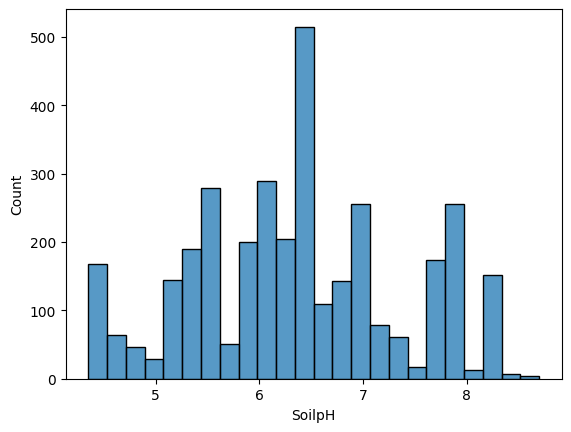

In [21]:
sns.histplot(df_filtered, x = 'SoilpH' )


Text(0.5, 1.0, 'Heatmap')

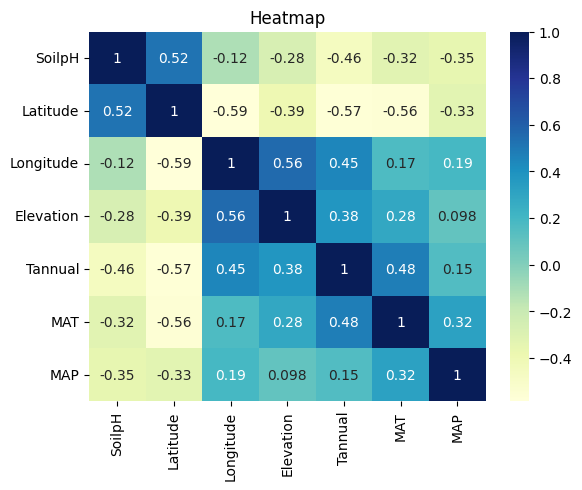

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
num_cor2 = df_filtered.select_dtypes(['int64','float64']).corr()
sns.heatmap(num_cor2,cmap = 'YlGnBu',annot = True)
plt.title('Heatmap')

In [23]:
from sklearn.preprocessing import LabelEncoder

def label_encode_all_categorical_columns(df):
    """
    Automatically label encode all categorical columns in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.

    Returns:
    - pd.DataFrame: DataFrame with label-encoded categorical columns.
    """
    df_filtered_encoded = df_filtered.copy()

    label_encoder = LabelEncoder()

    # Identify categorical columns
    categorical_columns = df_filtered.select_dtypes(include=['object']).columns

    # Label encode each categorical column
    for column in categorical_columns:
        df_filtered_encoded[column + '_encoded'] = label_encoder.fit_transform(df_filtered[column])

    return df_filtered_encoded

# Example usage:
# Assuming 'df' is your DataFrame
df_filtered_encoded = label_encode_all_categorical_columns(df_filtered)


In [24]:
df_filtered_encoded.head()

,SoilFamily,CoverCrop,CoverCropGroup,GrainCrop,GrainCropGroup,Texture,SoilpH,SiteInfor,Country,Latitude,...,MAT,MAP,SoilFamily_encoded,CoverCrop_encoded,CoverCropGroup_encoded,GrainCrop_encoded,GrainCropGroup_encoded,Texture_encoded,SiteInfor_encoded,Country_encoded
11,Pachic Ultic Argixeroll,Rye,Rye,Corn/Wheat/Broccoli,MTT,Silt loam,6.266667,North Willamette Research and Extension Ce...,USA,45.23,...,17.833333,1040.0,94,174,18,30,11,11,135,24
12,Pachic Ultic Argixeroll,Red_clover,Legume,Corn/Wheat/Broccoli,MTT,Silt loam,6.266667,North Willamette Research and Extension Ce...,USA,45.23,...,17.833333,1040.0,94,172,10,30,11,11,135,24
13,Haplustoll,Rye_Fall_seeded_winter,Rye,Dry_bean,Vegetable,Loam,6.100000,"Lethbridge, AB, Canada",Canada,49.69,...,14.000000,489.0,46,185,18,35,17,4,108,4
14,Haplustoll,Barley_Fall_seeded,Grass,Dry_bean,Vegetable,Loam,6.100000,"Lethbridge, AB, Canada",Canada,49.69,...,14.000000,489.0,46,23,6,35,17,4,108,4
15,Haplustoll,Oat_Fall_seeded,Grass,Dry_bean,Vegetable,Loam,6.100000,"Lethbridge, AB, Canada",Canada,49.69,...,14.000000,489.0,46,144,6,35,17,4,108,4


In [25]:
df_filtered_encoded['OptimalCrop'] = df_filtered_encoded['GrainCrop_encoded']

In [27]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import ShuffleSplit, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Assuming df_filtered_encoded is your DataFrame
# Drop the columns that are not needed for training
X = df_filtered_encoded.drop(['OptimalCrop', 'SoilFamily', 'CoverCrop', 'CoverCropGroup', 'GrainCrop', 'GrainCrop_encoded', 'GrainCropGroup', 'Texture', 'SiteInfor', 'Country'], axis=1)
y = df_filtered_encoded['OptimalCrop']

# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Oversample the minority class within each fold using ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
X_resampled = []
y_resampled = []

for train_index, test_index in shuffle_split.split(X, y_encoded):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    oversampler = RandomOverSampler(random_state=42)
    X_resampled_fold, y_resampled_fold = oversampler.fit_resample(X_train, y_train)

    X_resampled.append(X_resampled_fold)
    y_resampled.append(y_resampled_fold)

# Concatenate the lists into arrays
X_resampled = pd.concat(X_resampled, axis=0)
y_resampled = np.concatenate(y_resampled, axis=0)

# Create XGBoost model
xgboost_model = XGBClassifier(random_state=42)

# Simplify the grid search parameters
param_grid_xgb = {
    'n_estimators': [50],  # Reduced number of trees
    'max_depth': [3],
    'learning_rate': [0.01]
}

grid_search_xgb = GridSearchCV(estimator=xgboost_model, param_grid=param_grid_xgb, scoring='accuracy', cv=shuffle_split, n_jobs=-1)
grid_search_xgb.fit(X_resampled, y_resampled)

# Get the best parameters
best_params_xgb = grid_search_xgb.best_params_
print("Best Parameters - XGBoost:", best_params_xgb)

# Use the best model
best_xgboost_model = grid_search_xgb.best_estimator_

# Perform predictions using a loop over the folds
xgb_cv_predictions = np.empty_like(y_resampled)
for train_index, test_index in shuffle_split.split(X_resampled, y_resampled):
    best_xgboost_model.fit(X_resampled.iloc[train_index], y_resampled[train_index])
    xgb_cv_predictions[test_index] = best_xgboost_model.predict(X_resampled.iloc[test_index])

# Print Classification Report
print("\nClassification Report - XGBoost:")
print(classification_report(y_resampled, xgb_cv_predictions))

# Calculate ROC-AUC for XGBoost (multiclass)
roc_auc_xgb = roc_auc_score(y_resampled, best_xgboost_model.predict_proba(X_resampled), multi_class='ovr')
print("ROC-AUC:", roc_auc_xgb)

# Precision, Recall, F1 Score for each class
precision_xgb = precision_score(y_resampled, xgb_cv_predictions, average=None)
recall_xgb = recall_score(y_resampled, xgb_cv_predictions, average=None)
f1_score_xgb = f1_score(y_resampled, xgb_cv_predictions, average=None)

print("\nPrecision:", precision_xgb)
print("\nRecall:", recall_xgb)
print("\nF1 Score:", f1_score_xgb)


Best Parameters - XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}

Classification Report - XGBoost:


c:\Users\fulbe\anaconda3\envs\SIA\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\fulbe\anaconda3\envs\SIA\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\fulbe\anaconda3\envs\SIA\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.06      1.00      0.11      2888
           1       1.00      0.84      0.91      2888
           2       1.00      0.82      0.90      2888
           3       1.00      0.84      0.91      2888
           4       1.00      0.84      0.91      2888
           5       1.00      0.82      0.90      2888
           6       1.00      0.83      0.91      2888
           7       1.00      0.83      0.91      2888
           8       1.00      0.83      0.91      2888
           9       1.00      0.84      0.91      2888
          10       1.00      0.83      0.91      2888
          11       1.00      0.84      0.91      2888
          12       1.00      0.84      0.91      2297
          13       1.00      0.83      0.91      1737
          14       1.00      0.83      0.90      1726
          15       1.00      0.83      0.91      2888
          16       1.00      0.83      0.91      2888
          17       1.00    

c:\Users\fulbe\anaconda3\envs\SIA\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Precision: [0.06100549 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.         0.99730337 1.         1.         0.93220339 0.55405974
 1.         0.50401929 0.94710744 0.38834356 1.         1.
 1.         0.96713427 1.         0.69718922 0.79793264 1.
 0.54026354 0.95552932 1.         1.         0.90503432 0.94689907
 1.         1.         1.         1.         1.         0.49787234
 1.         1.         0.53435115 1.         1.         0.99709664
 1.         1.         0.78961136 0.92889289 0.32555696 0.32139951
 0.99792359 0.         0.         1.         1.         0.55941499
 0.68889578 0.99876797 0.995      1.         1.         1.
 0.55614603 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.5638415  0.
 0.37421452 1.         1.         1.         0.99137223

In [46]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import ShuffleSplit, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
from scipy.stats import randint, uniform

# Assuming df_filtered_encoded is your DataFrame
# Drop the columns that are not needed for training
X = df_filtered_encoded.drop(['OptimalCrop', 'SoilFamily', 'CoverCrop', 'CoverCropGroup', 'GrainCrop', 'GrainCrop_encoded', 'GrainCropGroup', 'Texture', 'SiteInfor', 'Country'], axis=1)
y = df_filtered_encoded['OptimalCrop']

# Label encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Oversample the minority class within each fold using ShuffleSplit
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
X_resampled = []
y_resampled = []
subsample_ratio = 0.8  # Adjust as needed

min_minority_samples = 1  # Adjust as needed

for train_index, test_index in shuffle_split.split(X, y_encoded):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_encoded[train_index], y_encoded[test_index]

    # Identify minority class indices
    minority_indices = np.where(y_train == 1)[0]

    # Ensure that at least 'min_minority_samples' samples of the minority class are included in each fold
    selected_indices = np.random.choice(minority_indices, size=max(min_minority_samples, int(len(minority_indices) * subsample_ratio)), replace=False)

    # Combine minority samples with majority samples
    X_resampled_fold = pd.concat([X_train, X_train.iloc[selected_indices]])
    y_resampled_fold = np.concatenate([y_train, y_train[selected_indices]])

    X_resampled.append(X_resampled_fold)
    y_resampled.append(y_resampled_fold)

# Concatenate the lists into arrays
X_resampled = pd.concat(X_resampled, axis=0)
y_resampled = np.concatenate(y_resampled, axis=0)

# Create XGBoost model with subsample set to a valid value within [0, 1]
xgboost_model = XGBClassifier(random_state=42, subsample=0.8)  # Adjust the subsample value as needed

# Simplify the grid search parameters (remove 'subsample')
param_grid_xgb = {
    'n_estimators': [50],
    'max_depth': [3],
    'learning_rate': [0.01],
    'colsample_bytree': [0.1, 0.5, 0.8, 1.0],  # Adjust the range as needed
}

# GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgboost_model, param_grid=param_grid_xgb, scoring='accuracy', cv=shuffle_split, n_jobs=-1)
grid_search_xgb.fit(X_resampled, y_resampled)

# Get the best parameters
best_params_xgb = grid_search_xgb.best_params_
print("Best Parameters - XGBoost (GridSearchCV):", best_params_xgb)

# Create XGBoost model for RandomizedSearchCV
xgboost_model_random = XGBClassifier(random_state=42)

# RandomizedSearchCV
param_dist = {
    'learning_rate': np.linspace(0.01, 0.1, 10),
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [3, 4, 5],
    'subsample': np.linspace(0.5, 1.0, 6),  # Adjust the range for subsample
    'colsample_bytree': np.linspace(0.1, 1.0, 10),  # Adjust the range for colsample_bytree
}

random_search = RandomizedSearchCV(
    xgboost_model_random, param_distributions=param_dist, n_iter=5, scoring='accuracy', cv=5
)

random_search.fit(X_resampled, y_resampled)
print("Best Parameters - XGBoost (RandomizedSearchCV):", random_search.best_params_)
# Use the best model from RandomizedSearchCV
best_xgboost_model_random = random_search.best_estimator_

# Evaluate the best model from RandomizedSearchCV
xgb_scores_random = cross_val_score(best_xgboost_model_random, X_resampled, y_resampled, cv=5, scoring='accuracy')
print("XGBoost Cross-Validation Scores (RandomizedSearchCV):")
print("Accuracy:", xgb_scores_random.mean())


Best Parameters - XGBoost (GridSearchCV): {'colsample_bytree': 0.5, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}


c:\Users\fulbe\anaconda3\envs\SIA\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters - XGBoost (RandomizedSearchCV): {'subsample': 0.9, 'n_estimators': 150, 'max_depth': 5, 'learning_rate': 0.020000000000000004, 'colsample_bytree': 0.5}


c:\Users\fulbe\anaconda3\envs\SIA\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


XGBoost Cross-Validation Scores (RandomizedSearchCV):
Accuracy: 0.9532256132829777


In [55]:
from xgboost import XGBClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have a validation set for evaluation, adjust as needed
X_val, y_val = X_resampled, y_resampled

# Label binarize the target variable
y_val_bin = label_binarize(y_val, classes=np.unique(y_val))

# Create XGBoost model with num_class set to the total number of unique classes
xgboost_model_multiclass = XGBClassifier(random_state=42, subsample=0.8, num_class=len(np.unique(y_val)))

# Fit the model
xgboost_model_multiclass.fit(X_resampled, y_resampled)

# Predicted probabilities
y_prob = xgboost_model_multiclass.predict_proba(X_val)

# Predictions on the validation set
y_pred = xgboost_model_multiclass.predict(X_val)

# Calculate precision, recall, and f1
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

# For ROC-AUC, you need predicted probabilities
roc_auc = roc_auc_score(y_val_bin, y_prob, average='weighted')

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC:", roc_auc)


c:\Users\fulbe\anaconda3\envs\SIA\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.9526839532902385
Recall: 0.9557003794753341
F1 Score: 0.9508978144011088
ROC-AUC: 0.9995046852362879


In [57]:
from xgboost import XGBClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Assuming you have a validation set for evaluation, adjust as needed
X_val, y_val = X_resampled, y_resampled

# Label binarize the target variable
y_val_bin = label_binarize(y_val, classes=np.unique(y_val))

# Create XGBoost model with num_class set to the total number of unique classes
xgboost_model_multiclass = XGBClassifier(random_state=42, subsample=0.8, num_class=len(np.unique(y_val)))

# Fit the model
xgboost_model_multiclass.fit(X_resampled, y_resampled)

# Predicted probabilities
y_prob = xgboost_model_multiclass.predict_proba(X_val)

# Predictions on the validation set
y_pred = xgboost_model_multiclass.predict(X_val)

# Calculate precision, recall, and f1
precision = precision_score(y_val, y_pred, average=None)
recall = recall_score(y_val, y_pred, average=None)
f1 = f1_score(y_val, y_pred, average=None)

# For ROC-AUC, you need predicted probabilities
roc_auc = roc_auc_score(y_val_bin, y_prob, average='weighted')

# Print the results
print("Precision for each class:", precision)
print("Recall for each class:", recall)
print("F1 Score for each class:", f1)
print("ROC-AUC:", roc_auc)


c:\Users\fulbe\anaconda3\envs\SIA\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision for each class: [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.         1.         0.89083821 1.         0.         0.53571429
 1.         0.5625     0.94777911 0.         1.         1.
 1.         1.         1.         0.91774194 1.         1.
 0.         0.55952381 1.         1.         0.89583333 1.
 1.         1.         1.         1.         1.         0.
 1.         1.         0.53333333 1.         1.         1.
 1.         1.         1.         0.87870968 0.         0.
 1.         0.36470588 0.53846154 1.         1.         0.
 0.71962617 1.         1.         1.         1.         1.
 0.53333333 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.92957746 0.
 0.79146919 1.         1.         1.         1.         1.        ]
Recall for ea

In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Fit the best XGBoost model obtained from RandomizedSearchCV on the training data
best_xgboost_model_random.fit(X_train, y_train)

# Predict on the test set
y_pred = best_xgboost_model_random.predict(X_test)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 2  0  0 ...  0  0  0]
 [ 0 28  0 ...  0  0  0]
 [ 0  0  4 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  7  0]
 [ 0  0  0 ...  0  0  4]]


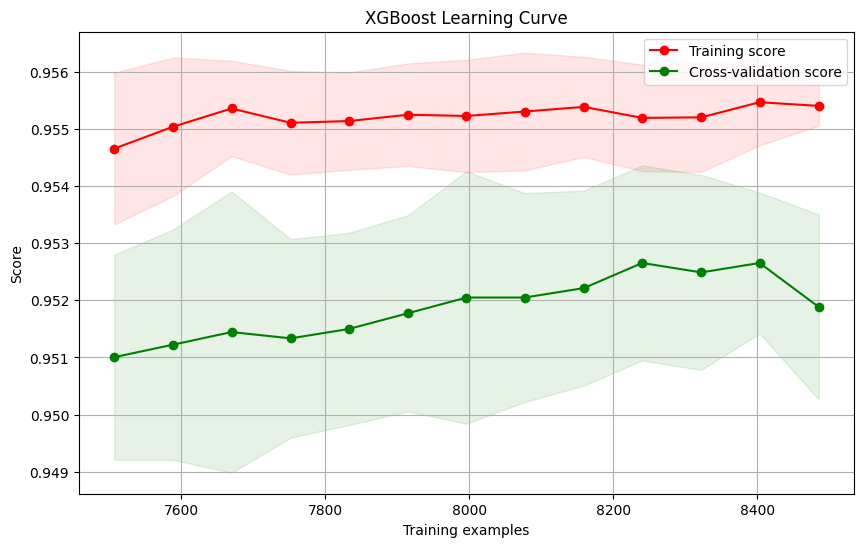

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, StratifiedShuffleSplit

# Create a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(0.05, 1.0, 100)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy'
    )
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(
        train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r"
    )
    plt.fill_between(
        train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g"
    )
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Assuming you have X_resampled and y_resampled from your previous code

# Create StratifiedShuffleSplit for better cross-validation
stratified_shuffle_split = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)

# Plot learning curve for XGBoost with more points
plot_learning_curve(
    best_xgboost_model_random, "XGBoost Learning Curve", X_resampled, y_resampled, cv=stratified_shuffle_split, n_jobs=-1,
    train_sizes=np.linspace(0.05, 1.0, 100)
)
plt.show()


In [72]:
import pickle
pickle.dump(best_xgboost_model_random, open('xgboost_model.pkl', 'wb'))

